In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # data visualization 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [9]:
import warnings

In [11]:
df = pd.read_csv("/Users/clarawabara/Downloads/stock_details_5_years.csv")

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [15]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


In [17]:
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


Data cleaning

In [20]:
# check null/missing values
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [24]:
num = df['Company'].nunique()
print("There are {} companies in this dataset".format(num))

all_companies = df['Company'].unique()
print("\n",all_companies)

There are 491 companies in this dataset

 ['AAPL' 'MSFT' 'GOOGL' 'AMZN' 'NVDA' 'META' 'TSLA' 'LLY' 'V' 'TSM' 'UNH'
 'AVGO' 'NVO' 'JPM' 'WMT' 'XOM' 'MA' 'JNJ' 'PG' 'ORCL' 'HD' 'ADBE' 'ASML'
 'CVX' 'COST' 'TM' 'MRK' 'KO' 'ABBV' 'BAC' 'PEP' 'FMX' 'CRM' 'SHEL' 'ACN'
 'NFLX' 'MCD' 'AMD' 'LIN' 'NVS' 'AZN' 'CSCO' 'TMO' 'BABA' 'INTC' 'PDD'
 'SAP' 'ABT' 'TMUS' 'PFE' 'DIS' 'NKE' 'CMCSA' 'DHR' 'INTU' 'TTE' 'WFC'
 'VZ' 'BHP' 'HDB' 'HSBC' 'PM' 'QCOM' 'IBM' 'AMGN' 'TXN' 'NOW' 'BA' 'COP'
 'UNP' 'BX' 'SPGI' 'UPS' 'GE' 'MS' 'HON' 'CAT' 'AMAT' 'BUD' 'AXP' 'RY'
 'NEE' 'UL' 'SNY' 'RTX' 'T' 'LOW' 'SBUX' 'RIO' 'TD' 'SYK' 'BLK' 'LMT' 'GS'
 'ELV' 'ISRG' 'BKNG' 'SONY' 'MDT' 'PLD' 'SCHW' 'DE' 'MUFG' 'BP' 'TJX'
 'BMY' 'PBR' 'MMC' 'MDLZ' 'AMT' 'PGR' 'LRCX' 'SHOP' 'ADP' 'EQNR' 'GILD'
 'CB' 'ADI' 'PANW' 'VRTX' 'ETN' 'UBS' 'CVS' 'C' 'REGN' 'KKR' 'MU' 'SNPS'
 'CI' 'MELI' 'BSX' 'ZTS' 'IBN' 'DEO' 'FI' 'CME' 'SO' 'EQIX' 'CDNS' 'KLAC'
 'SLB' 'MO' 'CNI' 'ENB' 'NTES' 'INFY' 'ITW' 'RELX' 'GSK' 'EOG' 'CNQ' 'BTI'
 'SHW' 'NOC'

In [26]:
df[['Date','Time']] = df['Date'].str.split(' ',expand=True)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df[['Date', 'Time', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Company']]
df.head

<bound method NDFrame.head of              Date            Time  Year        Open        High         Low  \
0      2018-11-29  00:00:00-05:00  2018   43.829761   43.863354   42.639594   
1      2018-11-29  00:00:00-05:00  2018  104.769074  105.519257  103.534595   
2      2018-11-29  00:00:00-05:00  2018   54.176498   55.007500   54.099998   
3      2018-11-29  00:00:00-05:00  2018   83.749496   84.499496   82.616501   
4      2018-11-29  00:00:00-05:00  2018   39.692784   40.064904   38.735195   
...           ...             ...   ...         ...         ...         ...   
602957 2023-11-29  00:00:00-05:00  2023   26.360001   26.397499   26.120001   
602958 2023-11-29  00:00:00-05:00  2023   27.680000   28.535000   27.680000   
602959 2023-11-29  00:00:00-05:00  2023   75.940002   76.555000   75.257500   
602960 2023-11-29  00:00:00-05:00  2023   45.230000   45.259998   44.040001   
602961 2023-11-29  00:00:00-05:00  2023   84.629997   84.995003   83.529999   

             Close   

Data visualization

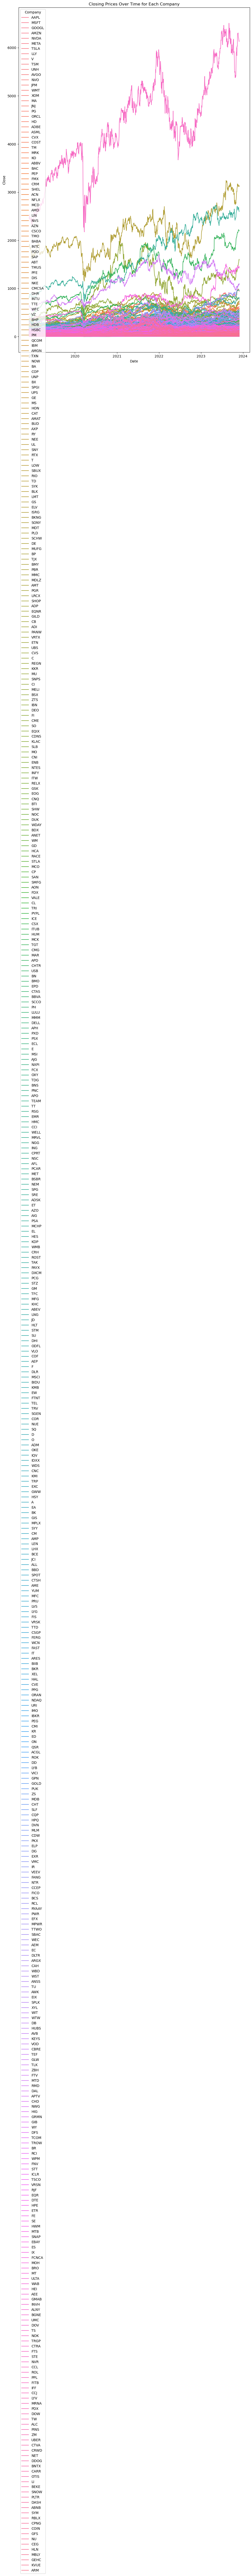

In [33]:
# Time series analysis - Plotting closing prices over time for each company
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 18))
sns.lineplot(data=df, x='Date', y='Close', hue='Company')
plt.title('Closing Prices Over Time for Each Company')
plt.savefig("Closing Prices Over Time for Each Company.png")
plt.show()

Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2014 ticks ([17773.0, ..., 19786.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

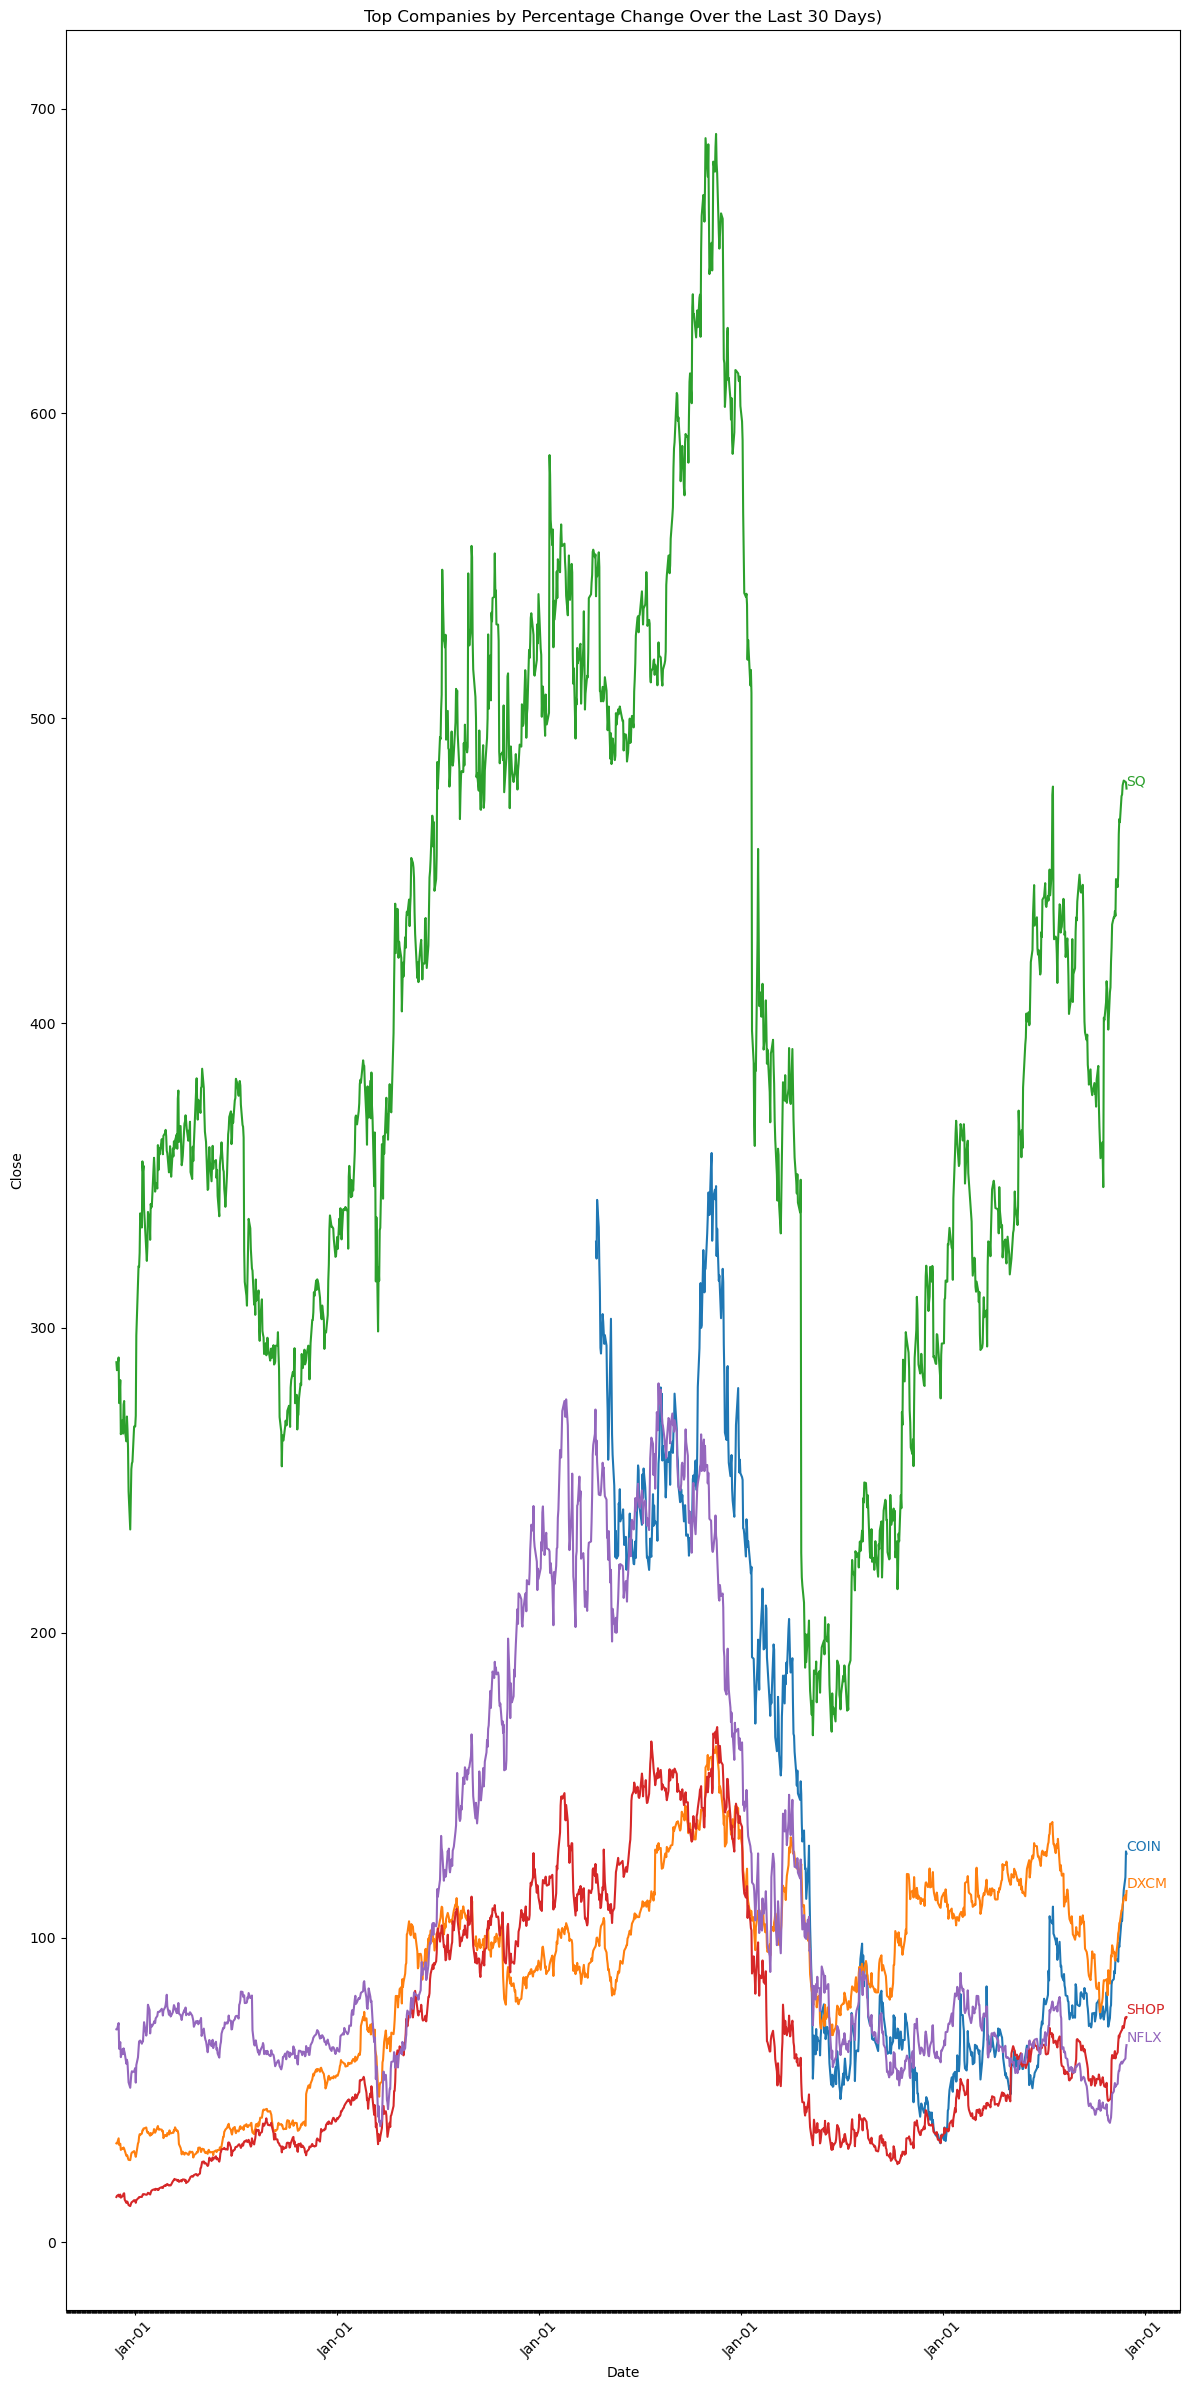

In [35]:
import matplotlib.dates as mdates

# Step 1: Calculate the percentage change in closing prices over the last 30 days
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Company', 'Date'])

# Calculate the 30-day percentage change for each company
df['30_day_pct_change'] = df.groupby('Company')['Close'].pct_change(periods=30) * 100

# Step 2: Get the latest percentage change for each company (i.e., the most recent data point)
latest_pct_change = df.groupby('Company').last()['30_day_pct_change']

# Step 3: Sort companies by the percentage change and get the top 5
top_companies = latest_pct_change.nlargest(5).index

# Step 4: Filter the dataset to include only the top 5 companies
top_companies_data = df[df['Company'].isin(top_companies)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 24))

# Plot the closing prices for the top-performing companies
sns.lineplot(ax=ax, data=top_companies_data, x='Date', y='Close', hue='Company', legend=None)

# Annotating the company names at the last data point of each line
for line, company in zip(ax.lines, top_companies):
    y = line.get_ydata()[-1]  # Last y-value
    x = line.get_xdata()[-1]  # Last x-value
    if not np.isfinite(y):
        y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue
    text = ax.annotate(company,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords='data',
                       textcoords="offset points",
                       ha="left", va="bottom")  # Adjust the alignment as needed
    
    # Adjust xlim to avoid clipping of annotations
    text_width = text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.25)

# Format the date axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format to show month-day
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Show minor ticks for each day
ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))  # Automatically adjust major ticks

# Rotate the date labels for better visibility
plt.xticks(rotation=45)
plt.title("Top Companies by Percentage Change Over the Last 30 Days)")
# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plot
plt.savefig("Top Companies by Percentage Change Over the Last 30 Days).png")
plt.show()


Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

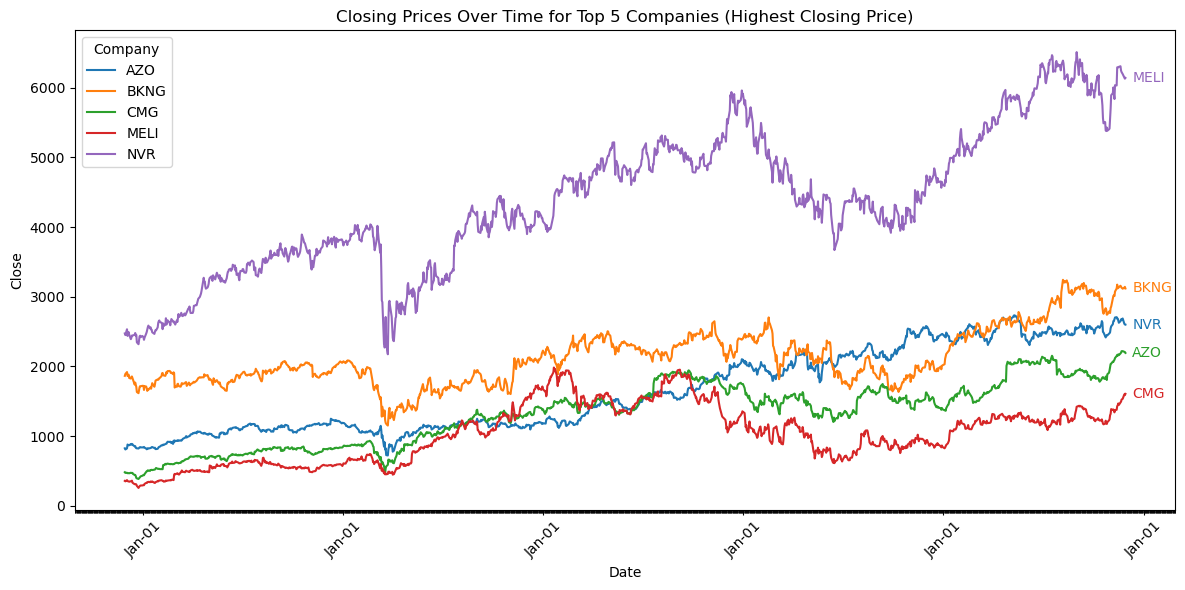

In [37]:

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataset to ensure the latest closing prices are correctly identified
df = df.sort_values(by=['Company', 'Date'])

# Step 1: Get the latest closing price for each company
latest_close = df.groupby('Company').last()['Close']

# Step 2: Get the top 5 companies by highest closing price
top_companies = latest_close.nlargest(5).index

# Step 3: Filter dataset for only these top-performing companies
top_companies_data = df[df['Company'].isin(top_companies)]

# Step 4: Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot closing prices over time for the top companies
sns.lineplot(ax=ax, data=top_companies_data, x='Date', y='Close', hue='Company')

# Annotate the last closing price for each top company
for line, company in zip(ax.lines, top_companies):
    y = line.get_ydata()[-1]  # Last y-value (latest closing price)
    x = line.get_xdata()[-1]  # Last x-value (latest date)
    
    if not np.isfinite(y) or not np.isfinite(x):
        continue  # Skip if values are invalid

    ax.annotate(company,
                xy=(x, y),
                xytext=(5, 0),
                textcoords="offset points",
                color=line.get_color(),
                ha="left", va="center")

# Format the date axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format as Month-Day
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Show daily ticks
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust major ticks

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Improve layout
plt.title("Closing Prices Over Time for Top 5 Companies (Highest Closing Price)")
plt.tight_layout()
plt.savefig("Closing Prices Over Time for Top 5 Companies (Highest Closing Price).png")
plt.show()


Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2009 ticks ([17773.0, ..., 19781.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

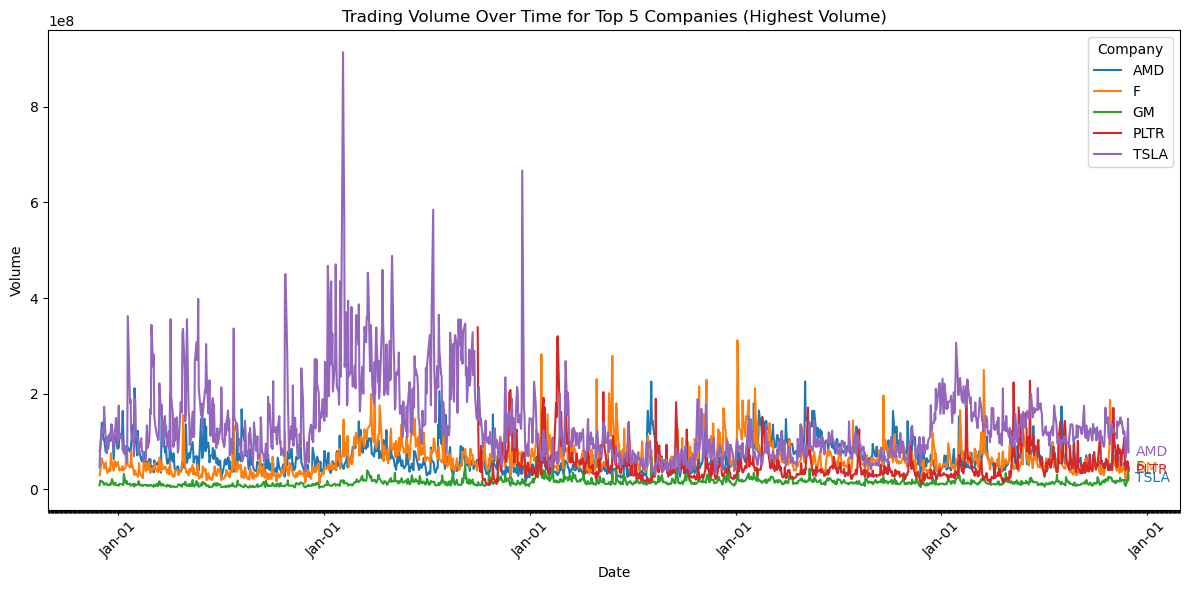

In [39]:

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataset to ensure we get the latest trading volume for each company
df = df.sort_values(by=['Company', 'Date'])

# Step 1: Get the latest trading volume for each company
latest_volume = df.groupby('Company').last()['Volume']

# Step 2: Get the top 5 companies by highest trading volume
top_companies = latest_volume.nlargest(5).index

# Step 3: Filter dataset for only these top-performing companies
top_companies_data = df[df['Company'].isin(top_companies)]

# Step 4: Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot trading volume over time for the top companies
sns.lineplot(ax=ax, data=top_companies_data, x='Date', y='Volume', hue='Company')

# Annotate the last volume point for each company
for line, company in zip(ax.lines, top_companies):
    y = line.get_ydata()[-1]  # Last y-value (latest volume)
    x = line.get_xdata()[-1]  # Last x-value (latest date)
    
    if not np.isfinite(y) or not np.isfinite(x):
        continue  # Skip if values are invalid

    ax.annotate(company,
                xy=(x, y),
                xytext=(5, 0),
                textcoords="offset points",
                color=line.get_color(),
                ha="left", va="center")

# Format the date axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  # Format as Month-Day
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Show daily ticks
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust major ticks

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Improve layout
plt.title("Trading Volume Over Time for Top 5 Companies (Highest Volume)")
plt.tight_layout()
plt.savefig("Trading Volume Over Time for Top 5 Companies (Highest Volume).png")
plt.show()


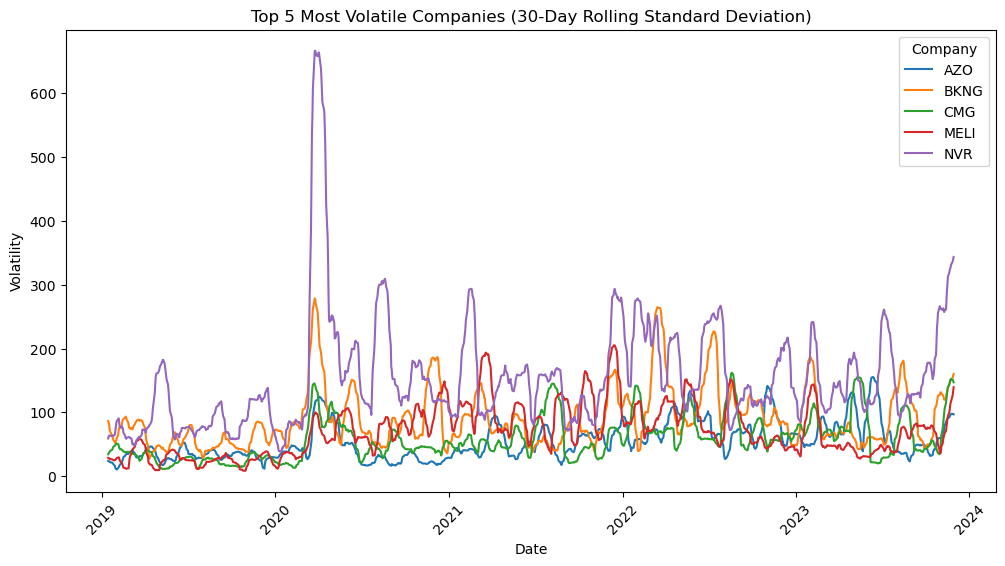

In [41]:
df['Volatility'] = df.groupby('Company')['Close'].rolling(window=30).std().reset_index(0, drop=True)

# Get the top 5 most volatile companies
top_volatile = df.groupby('Company')['Volatility'].mean().nlargest(5).index
top_volatile_data = df[df['Company'].isin(top_volatile)]

# Plot volatility trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_volatile_data, x='Date', y='Volatility', hue='Company')
plt.title("Top 5 Most Volatile Companies (30-Day Rolling Standard Deviation)")
plt.xticks(rotation=45)
plt.savefig("Top 5 Most Volatile Companies (30-Day Rolling Standard Deviation).png")
plt.show()


Moving average & Trend analysis

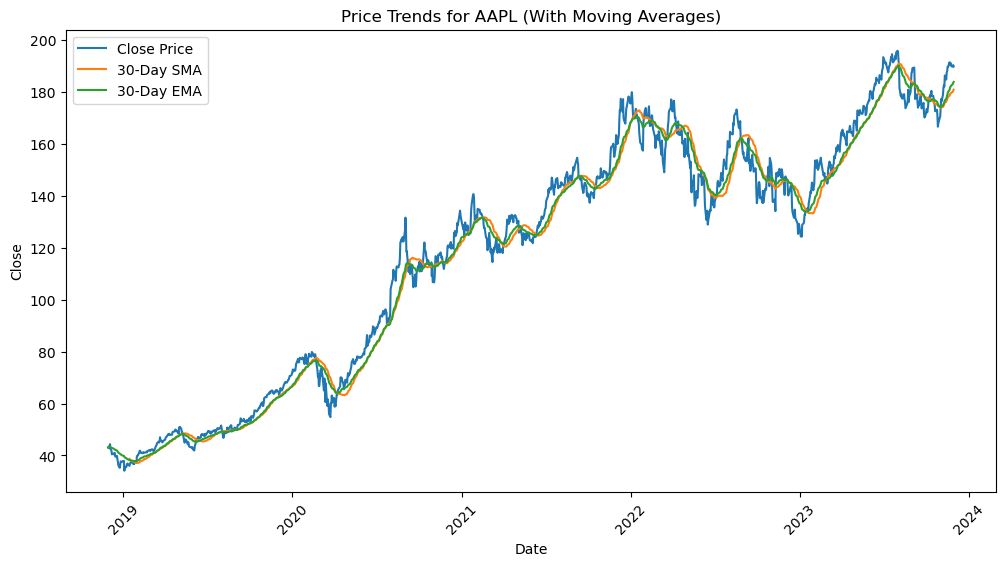

In [43]:
df['SMA_30'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(window=30).mean())
df['EMA_30'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=30, adjust=False).mean())

# Plot moving averages for a single company (modify as needed)
company_name = "AAPL"  # Change to any company you want to analyze
company_data = df[df['Company'] == company_name]

plt.figure(figsize=(12, 6))
sns.lineplot(data=company_data, x='Date', y='Close', label="Close Price")
sns.lineplot(data=company_data, x='Date', y='SMA_30', label="30-Day SMA")
sns.lineplot(data=company_data, x='Date', y='EMA_30', label="30-Day EMA")
plt.title(f"Price Trends for {company_name} (With Moving Averages)")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("Price Trends for {company_name} (With Moving Averages).png")
plt.show()


Correlation between price & Volume

In [42]:
correlation = df.groupby('Company')[['Close', 'Volume']].corr().iloc[0::2, -1].reset_index()
correlation.columns = ['Company', 'Drop', 'Correlation']
correlation = correlation[['Company', 'Correlation']]

# Sort companies by correlation strength
top_corr = correlation.sort_values(by='Correlation', ascending=False)

# Display the top 10 companies with highest correlation
print(top_corr.head(10))


    Company  Correlation
450     UMC     0.725685
413     SYM     0.528752
471     WDS     0.498359
38      ARM     0.443609
317     NTR     0.419588
67     BNTX     0.396922
84      CCJ     0.380697
304    MUFG     0.371304
57     BIDU     0.330525
223    IBKR     0.312500


Dividend Analysis

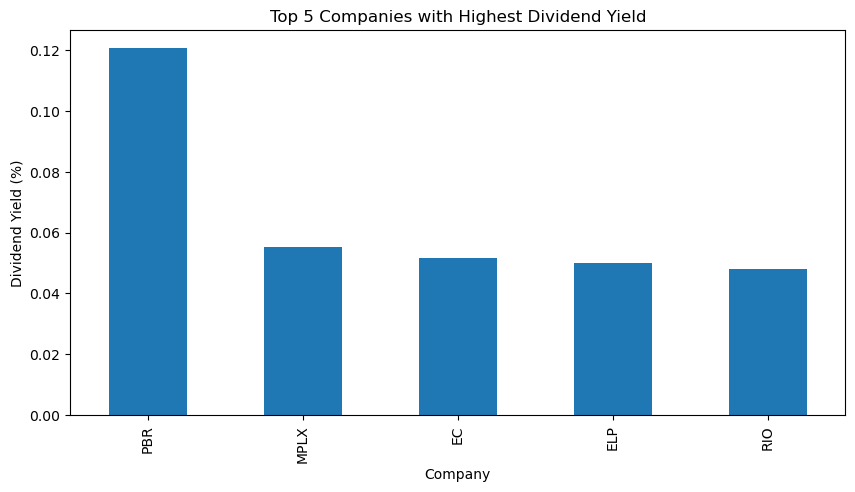

In [45]:
df['Dividend_Yield'] = (df['Dividends'] / df['Close']) * 100

# Get the top 5 companies with highest average dividend yield
top_dividends = df.groupby('Company')['Dividend_Yield'].mean().nlargest(5)

# Plot
top_dividends.plot(kind='bar', figsize=(10, 5), title="Top 5 Companies with Highest Dividend Yield")
plt.ylabel("Dividend Yield (%)")
plt.savefig("Top 5 Companies with Highest Dividend Yield.png")
plt.show()


Stock split impact on price

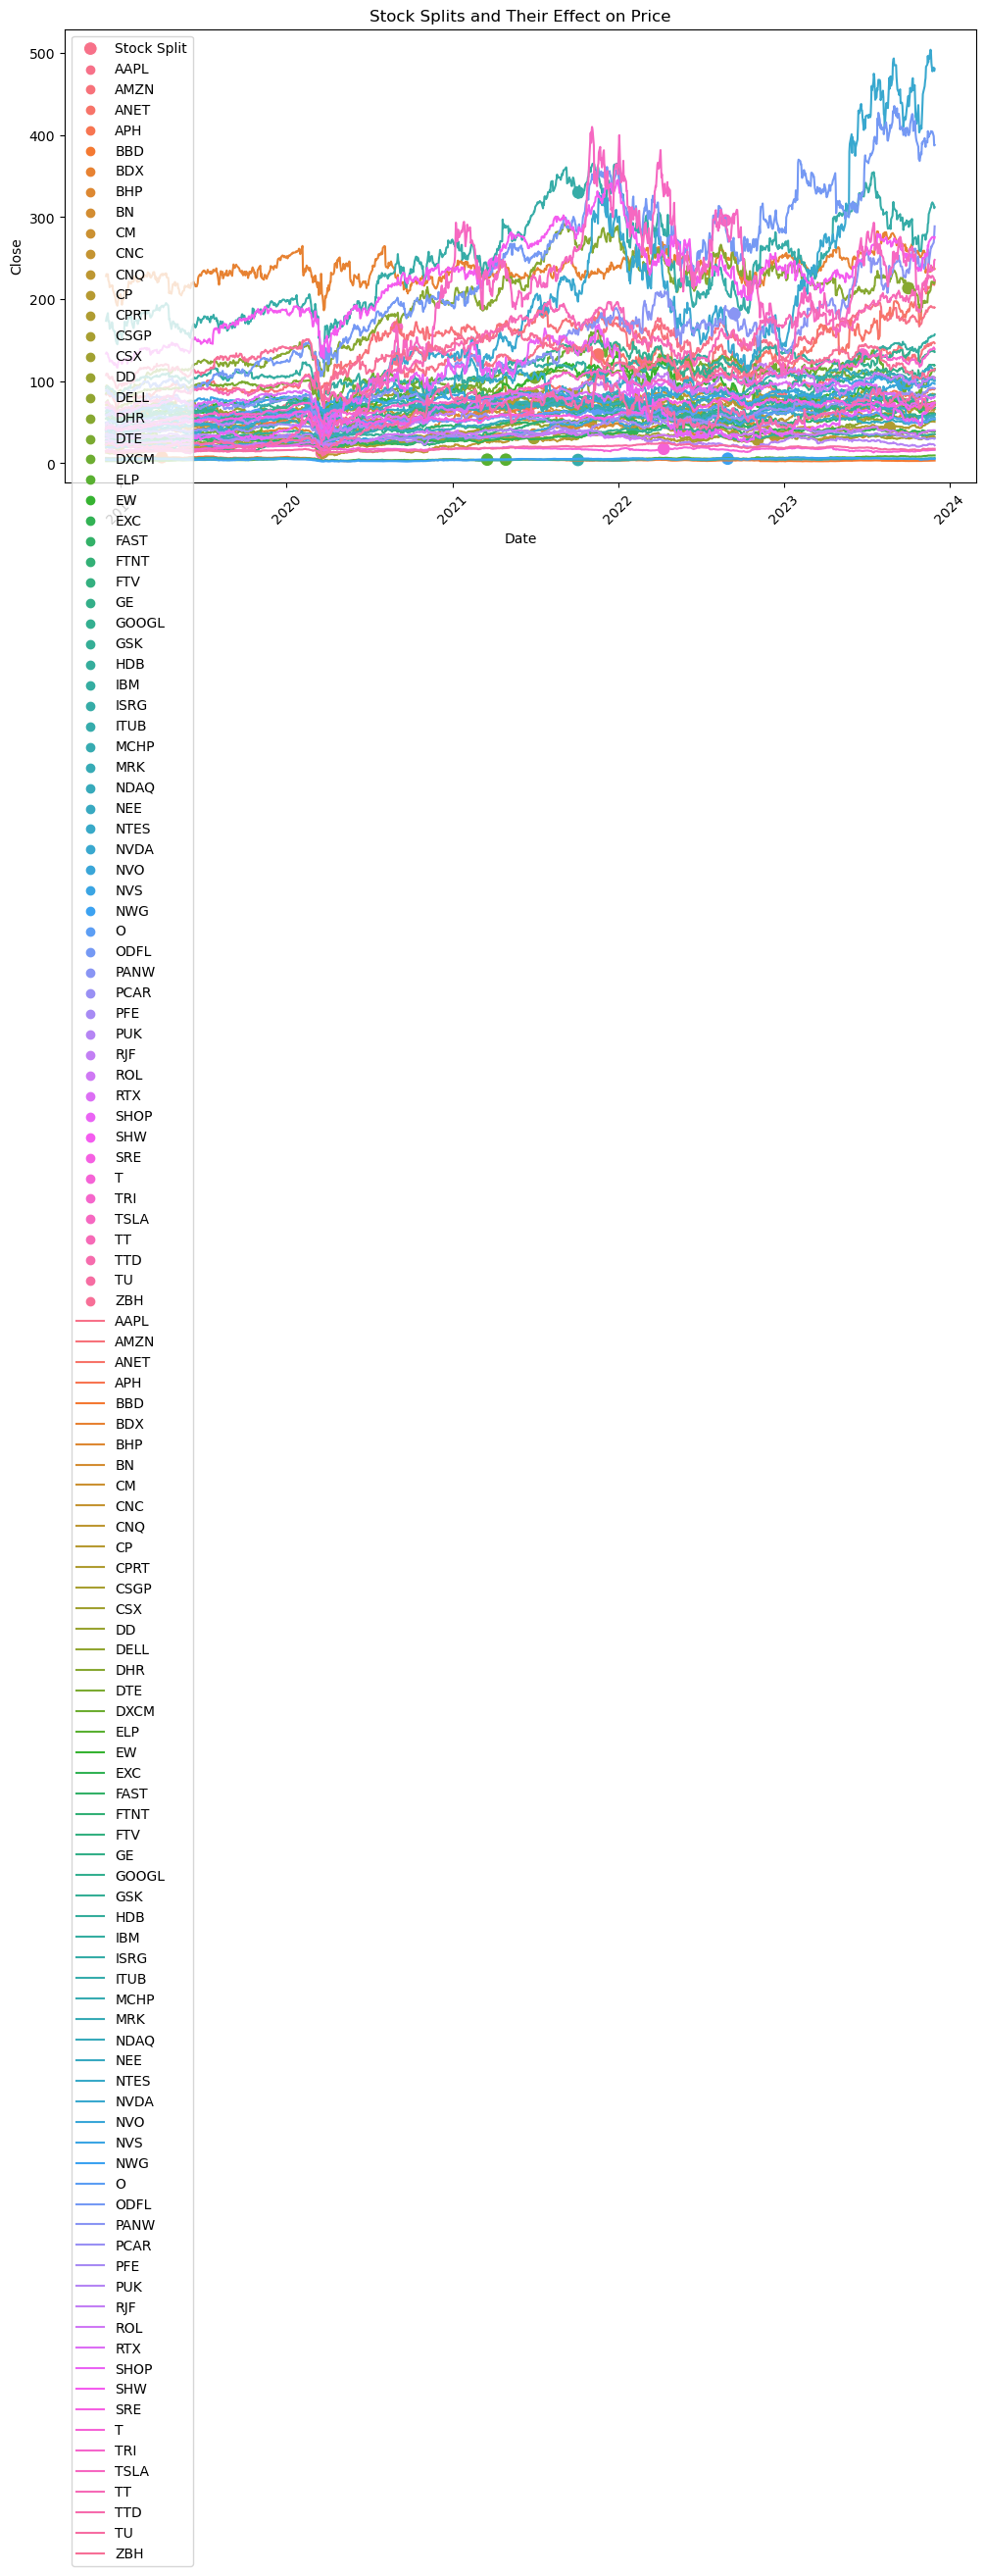

In [47]:
split_data = df[df['Stock Splits'] > 0]  # Get rows where a stock split occurred

# Plot stock splits and price movement
plt.figure(figsize=(12, 6))
sns.scatterplot(data=split_data, x='Date', y='Close', hue='Company', marker='o', s=100, label="Stock Split")
sns.lineplot(data=df[df['Company'].isin(split_data['Company'].unique())], x='Date', y='Close', hue='Company')
plt.title("Stock Splits and Their Effect on Price")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("Stock Splits and Their Effect on Price")
plt.show()


Detecting Outliers

In [51]:
from scipy.stats import zscore

df['Close_Z_Score'] = df.groupby('Company')['Close'].transform(lambda x: zscore(x))

# Get top 10 outliers (biggest price jumps or crashes)
outliers = df[df['Close_Z_Score'].abs() > 3].sort_values(by='Close_Z_Score', ascending=False)
print(outliers[['Date', 'Company', 'Close', 'Close_Z_Score']].head(10))


             Date Company       Close  Close_Z_Score
272386 2021-03-19     WBD   77.269997       5.403476
271904 2021-03-18     WBD   75.949997       5.270191
270940 2021-03-16     WBD   75.809998       5.256055
272868 2021-03-22     WBD   74.650002       5.138926
262661 2021-02-19    BIDU  339.910004       5.102208
271422 2021-03-17     WBD   74.070000       5.080361
270458 2021-03-15     WBD   73.669998       5.039972
263140 2021-02-22    BIDU  335.790009       4.994955
273350 2021-03-23     WBD   71.680000       4.839035
269976 2021-03-12     WBD   71.099998       4.780470


Predicting future prices

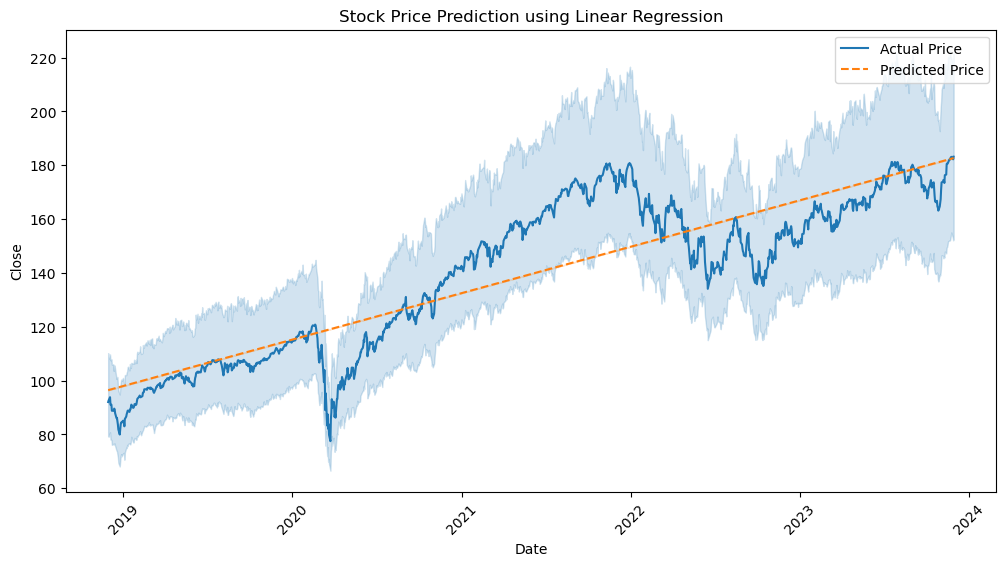

In [49]:
from sklearn.linear_model import LinearRegression

df['Days'] = (df['Date'] - df['Date'].min()).dt.days  # Convert dates to numerical values

X = df[['Days']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)

# Predict future prices
df['Predicted_Close'] = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close', label="Actual Price")
sns.lineplot(data=df, x='Date', y='Predicted_Close', label="Predicted Price", linestyle="dashed")
plt.title("Stock Price Prediction using Linear Regression")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("Stock Price Prediction using Linear Regression")
plt.show()
